<a href="https://colab.research.google.com/github/xanasa14/Finances/blob/main/BuySell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing needed libraries

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [13]:
stock_price_df = pd.read_csv('/content/drive/MyDrive/YahooData/YahooFinanceData.csv')
#print(stock_price_df['AMZN'].head())
#print(stock_price_df['AMZN'].tail())


df = pd.DataFrame()
df['AMZN'] = stock_price_df['AMZN'].values
df = df.dropna()
df

,AMZN
0,753.669983
1,757.179993
2,780.450012
3,795.989990
4,796.919983
...,...
1071,3279.389893
1072,3299.300049
1073,3372.199951
1074,3379.389893


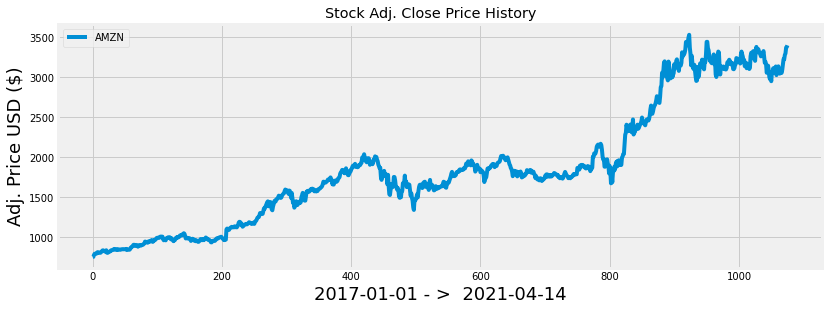

In [16]:
# Visually Show The Stock/Portfolio Price(s)
# Create the title 
title = 'Stock Adj. Close Price History    '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
  
plt.title(title)
plt.xlabel('2017-01-01 - >  2021-04-14',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [17]:
#Create the 30 day simple moving average
SMA30 = df.rolling(window=30).mean()
SMA30

,AMZN
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1071,3092.361003
1072,3097.020003
1073,3107.521338
1074,3117.070003


In [18]:
#Create the 100 day simple moving average
SMA100 = df.rolling(window=100).mean()
SMA100

,AMZN
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1071,3173.561089
1072,3175.180190
1073,3177.799390
1074,3180.305188
